## Working with Audio in Python

This notebook is intended to be an introduction for anyone interested in using python to interpret audio data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

### Imports

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd  # for playing audio files 
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

### Terms to know for Audio in Digital Form:

#### Frequency (Hz)
    * Frequency describes the differences of wave lengths.
    * We interpret frequency has high and low pitches. 
    
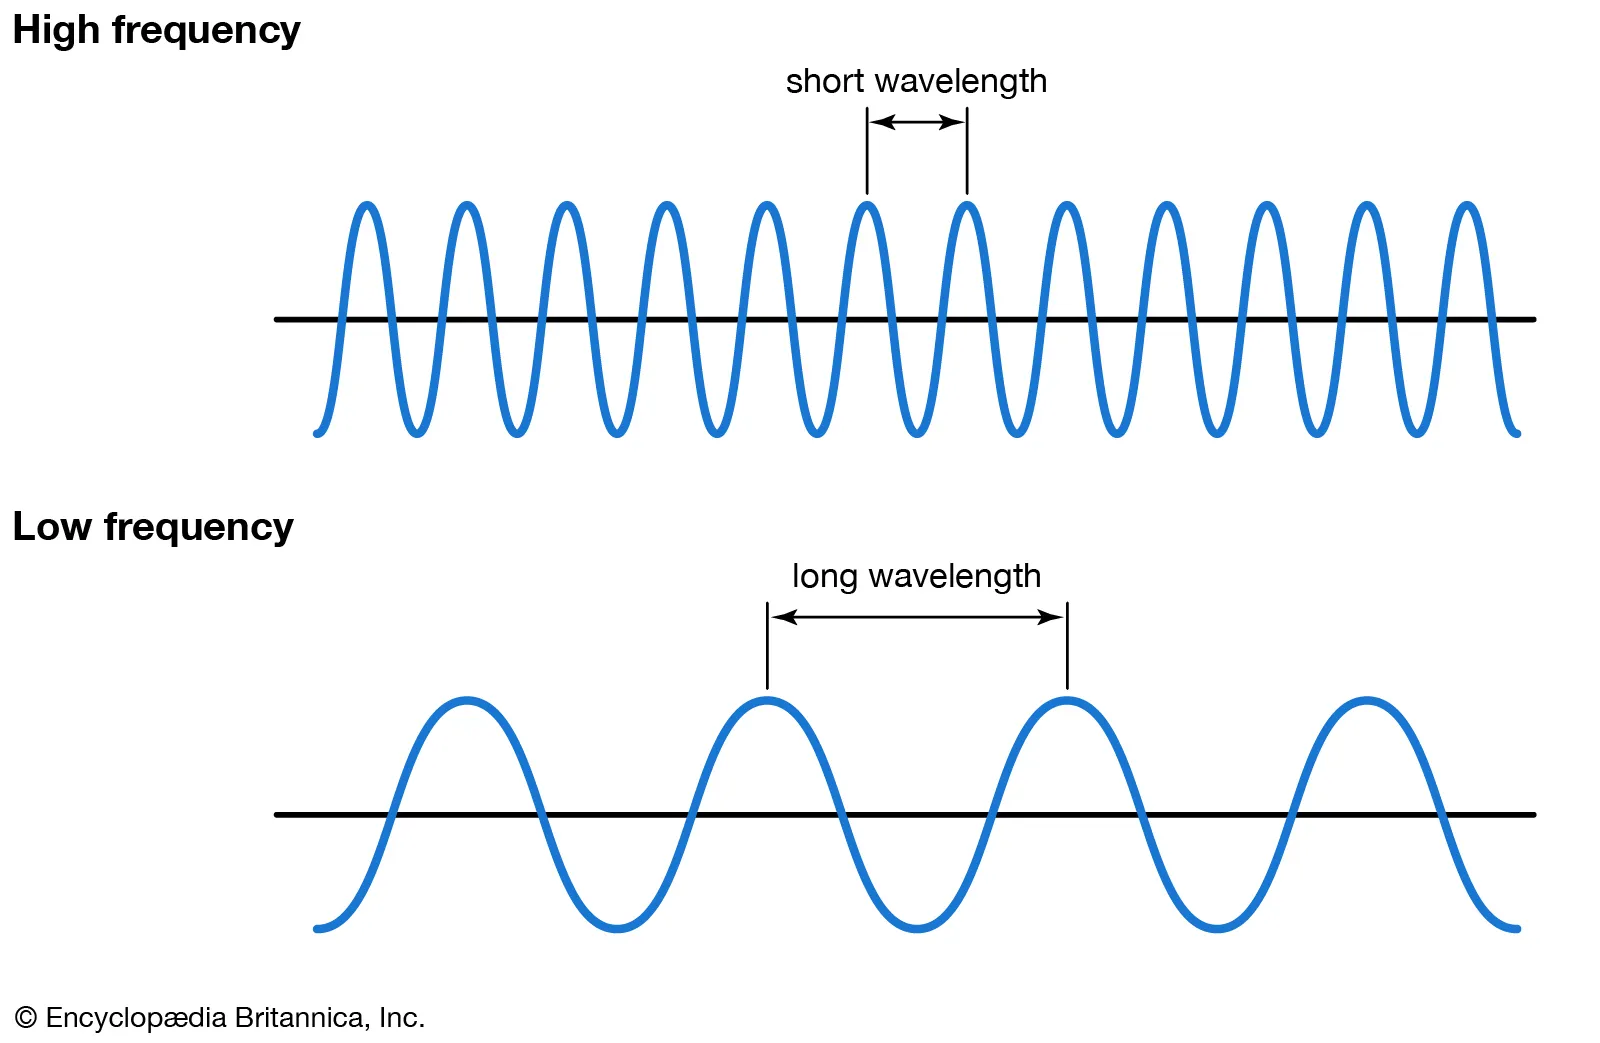

### Intensity (db/power)

* Intensity describes the amplitude (height) of the wave.

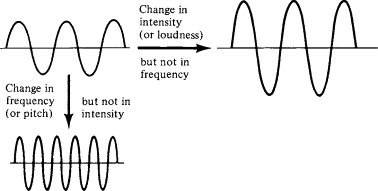

### Sample Rate
    * Sample rate is specific to how the computer reads in the audio file. 
    * Think of it as the "resolution" of the audio.
    
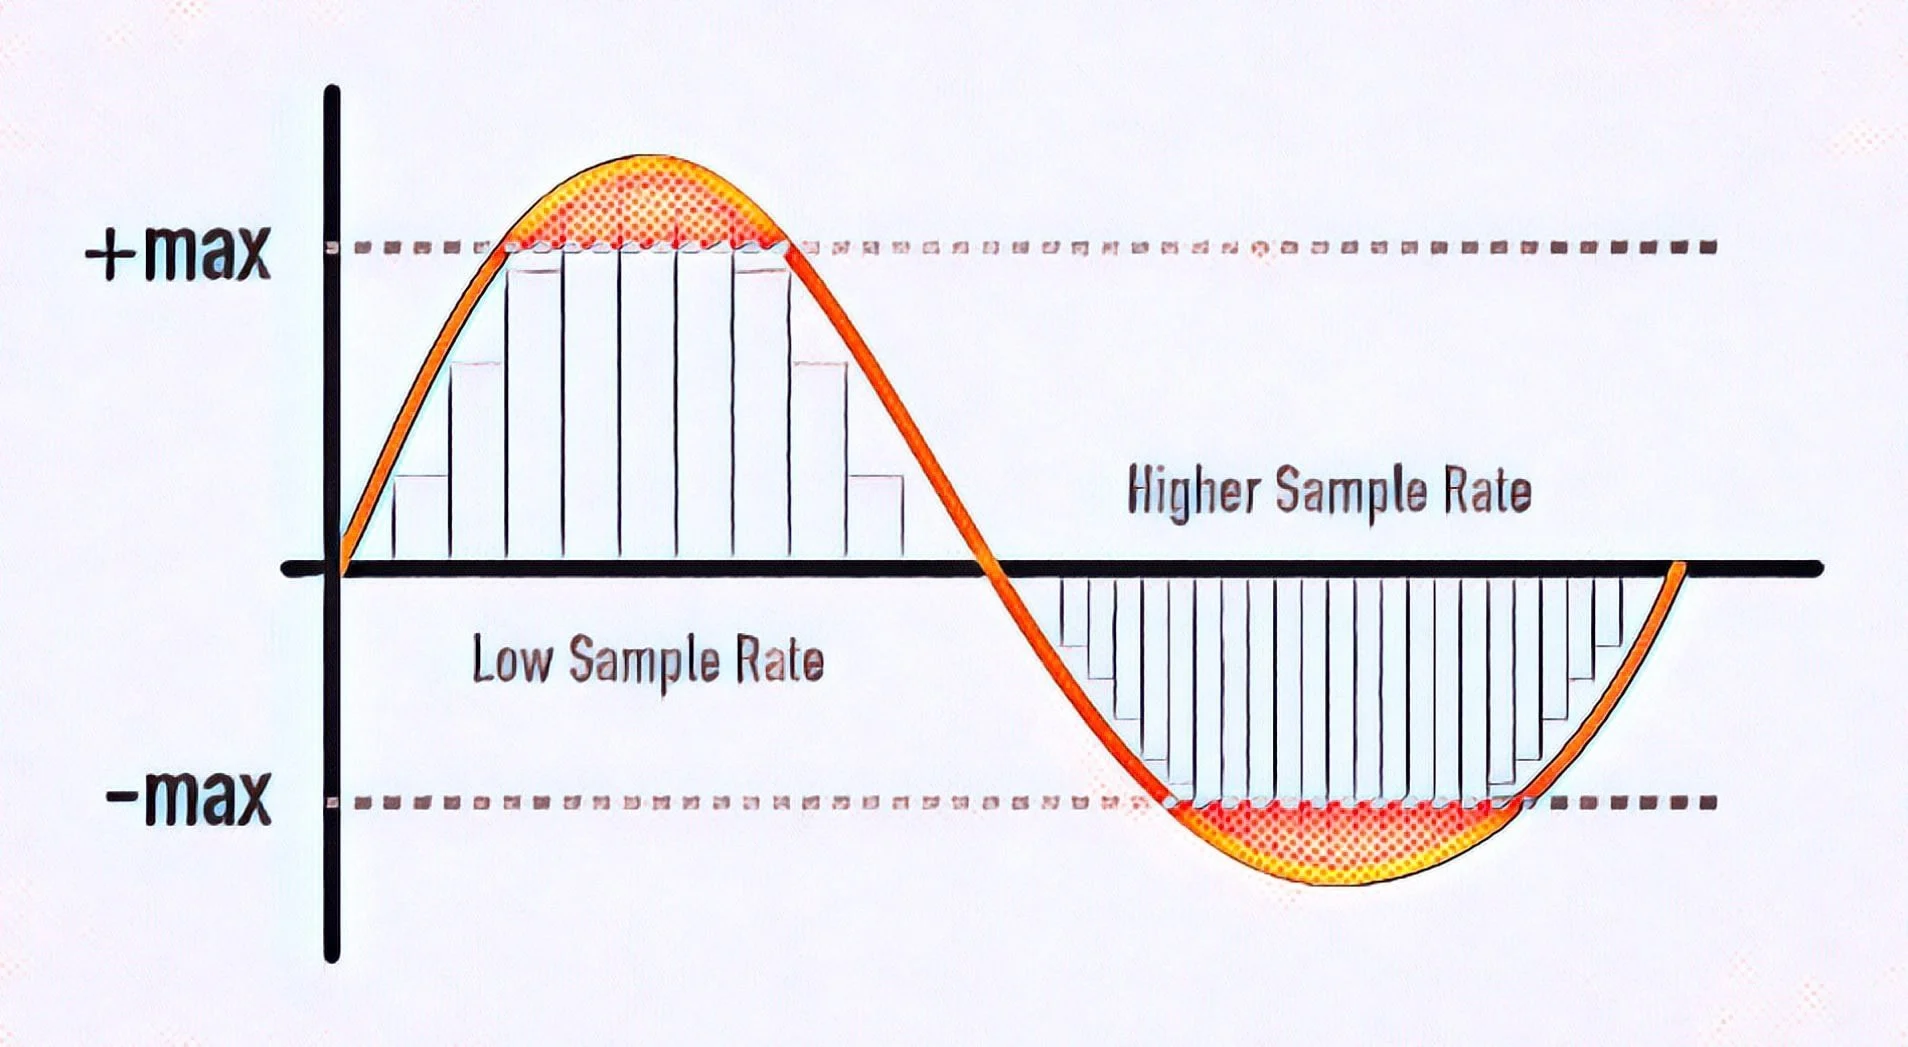

### Reading in Audio Files 
There are many types of audio files : mp3, wav, m4a, flac, ogg

In [5]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [6]:
# Play audio file 
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])

In [10]:
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


In [19]:
y

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  4.006272e-06,
       -2.672717e-06,  0.000000e+00], dtype=float32)

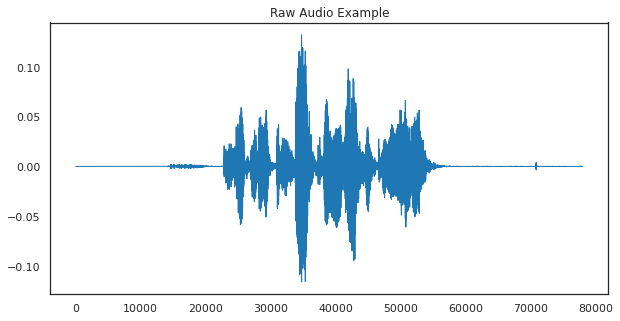

In [17]:
pd.Series(y).plot(figsize=(10,5), 
                  lw=1, 
                  title='Raw Audio Example',
                  color= color_pal[0])
plt.show()

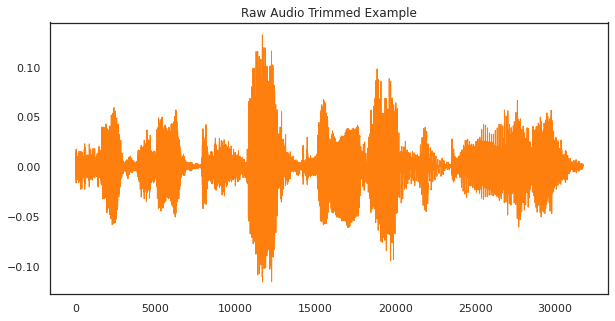

In [21]:
y_trimmed, _ = librosa.effects.trim(y, top_db = 20)

pd.Series(y_trimmed).plot(figsize=(10,5), 
                  lw=1, 
                  title='Raw Audio Trimmed Example',
                  color= color_pal[1])
plt.show()

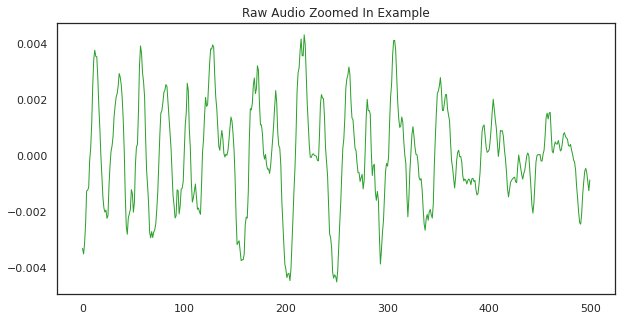

In [25]:
pd.Series(y[30000:30500]).plot(figsize=(10,5), 
                  lw=1, 
                  title='Raw Audio Zoomed In Example',
                  color= color_pal[2])
plt.show()

### Spectogram

In [28]:
# Audio Fourier Transformation
D = librosa.stft(y) # soft fourier transform
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 153)

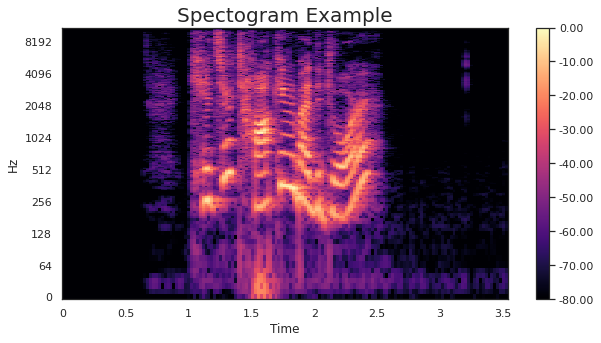

In [33]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel Spectrogram

In [42]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

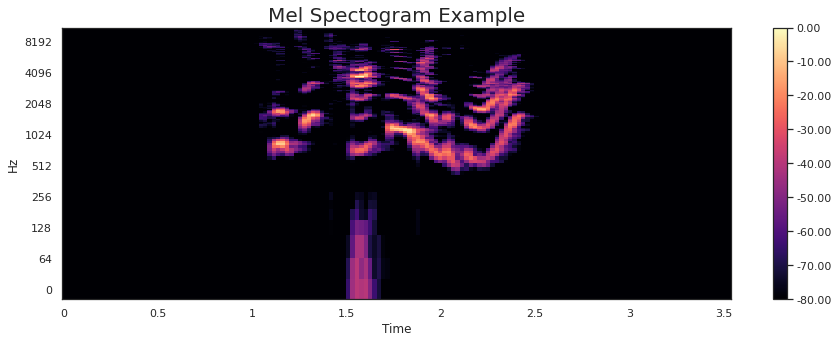

In [43]:
# Plot the mel spectrogram
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(S_db_mel, 
                                 x_axis='time',
                                 y_axis='log',
                                 ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()